In [1]:
import nbimporter
import numpy as np
from map import Map
import time
from organisms import Organism, Plant
from engine import World
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.display import clear_output

Importing Jupyter notebook from map.ipynb
Importing Jupyter notebook from organisms.ipynb
Importing Jupyter notebook from engine.ipynb


In [2]:
m = Map(20, n_random=50, color='#cccccc')
seeds = [Plant(i, m, delta=0.3, mu=0.5) for i in np.random.randint(0, m.map.shape[0], 1)]

In [3]:
W = World(m, seeds, tile_limit=50)

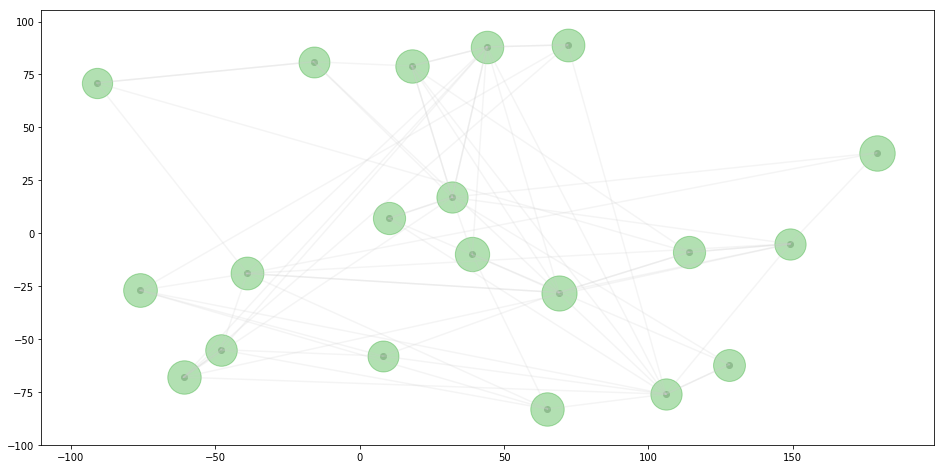

In [4]:
visualize = True
for iteration in W.simulate_death(100):
    print(iteration)
    clear_output(wait=True)
    if visualize:
        fig, ax = plt.subplots(figsize=(16,8))
        W.show(ax)
        plt.show()

In [5]:
S = W.stats()

In [6]:
S.head()

,age,death,gen,lon,lat,gamma,delta,mu,organism
0,27,NaN,10,72,89,0.393939,0.01,0.1,plant
1,25,NaN,9,72,89,0.354168,0.01,0.1,plant
2,22,NaN,5,72,89,0.299326,0.01,0.1,plant
3,22,NaN,5,72,89,0.352867,0.01,0.1,plant
4,22,NaN,6,72,89,0.284993,0.01,0.1,plant


In [7]:
S[S.death > 0].head()

,age,death,gen,lon,lat,gamma,delta,mu,organism
1064,4,8.0,1,72,89,0.291441,0.01,0.1,plant
1065,10,10.0,3,72,89,0.200000,0.30,0.5,plant
1066,7,10.0,2,72,89,0.284953,0.01,0.1,plant
1067,5,10.0,2,-61,-68,0.388866,0.01,0.1,plant
1068,4,13.0,1,-61,-68,0.394849,0.01,0.1,plant


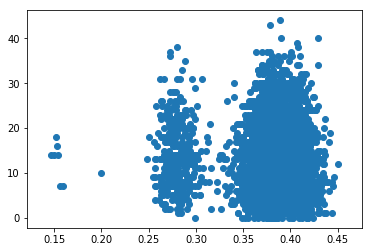

In [8]:
plt.scatter(S.gamma, S.age)
plt.show()

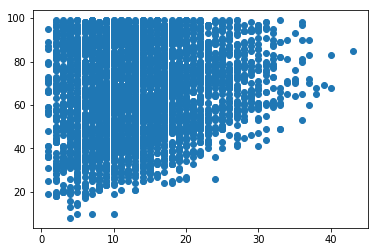

In [9]:
plt.scatter(S.age, S.death)
plt.show()

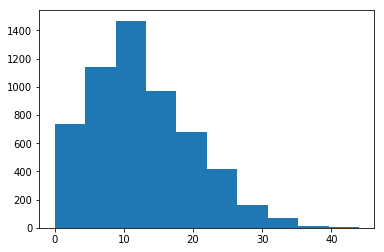

In [10]:
plt.hist(S.age)
plt.show()

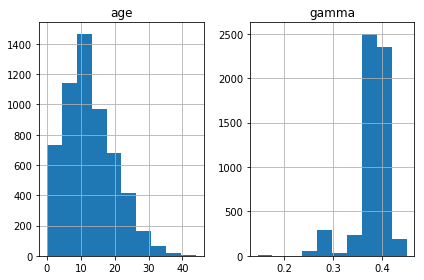

In [11]:
S[['age', 'gamma']].hist()
plt.tight_layout()
plt.show()

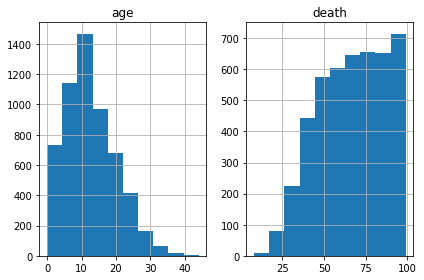

In [12]:
S[['age', 'death']].hist()
plt.tight_layout()
plt.show()

In [13]:
S.corr()

,age,death,gen,lon,lat,gamma,delta,mu
age,1.000000,0.169377,0.838270,-0.017184,0.007183,-0.036029,-0.004721,-0.004721
death,0.169377,1.000000,0.155585,-0.001998,-0.002759,0.078781,-0.041661,-0.041661
gen,0.838270,0.155585,1.000000,-0.035397,-0.019548,0.105626,-0.007234,-0.007234
lon,-0.017184,-0.001998,-0.035397,1.000000,0.007976,-0.052431,0.006642,0.006642
lat,0.007183,-0.002759,-0.019548,0.007976,1.000000,-0.124915,0.020833,0.020833
gamma,-0.036029,0.078781,0.105626,-0.052431,-0.124915,1.000000,-0.072146,-0.072146
delta,-0.004721,-0.041661,-0.007234,0.006642,0.020833,-0.072146,1.000000,1.000000
mu,-0.004721,-0.041661,-0.007234,0.006642,0.020833,-0.072146,1.000000,1.000000
